# **Practical work on Decision trees**

DONE BY: 

1.   Haileleul Haile | haileleul.haile@ip-paris.fr 
2.   Jules Soria | jules.soria@ip-paris.fr 
3.   Jana Sweidan | jana.sweidan@ip-paris.fr
4.   Thomas Wimmer | thomas.wimmer@ip-paris.fr  
5.   Ümit Bora Gökbakan | umit.gokbakan@ip-paris.fr
6.   Henon Mengistu Lamboro | henon.lamboro@ip-paris.fr

In [1]:
# This practial work on decision trees uses https://scikit-learn.org/stable/modules/tree.html

import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

# to get the documentation: use help(tree.DecisionTreeClassifier)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

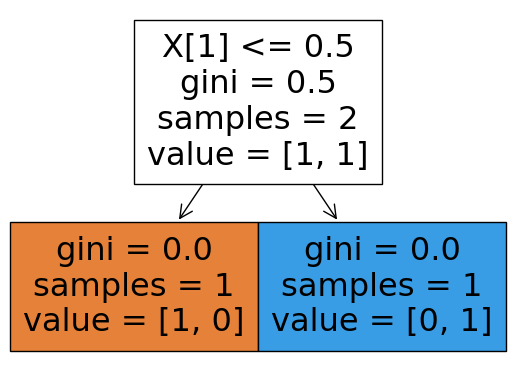

In [4]:
# display of the tree
tree.plot_tree(clf, filled=True)

#### Question 1: What is the node test used to build the tree? Explain the prediction for the new sample.

**Answer for Question #1** 


When a new data sample is entered, first the tree checks the 1st index (2nd dimension) value of the given sample. If it is less than 0.5, it classifies the sample as label 0. If the 1st index value is greater than 0.5, it classifies the sample as label 1.

In the case of the sample data ([2,2]), it can already be noticed that it is outside the scale of the training samples, so it is expected to be classified as label 1. The tree first checks the values of X[1], which is 2. Since 2 > 0.5, the sample is pushed to the right node, which classifies it as label 1.



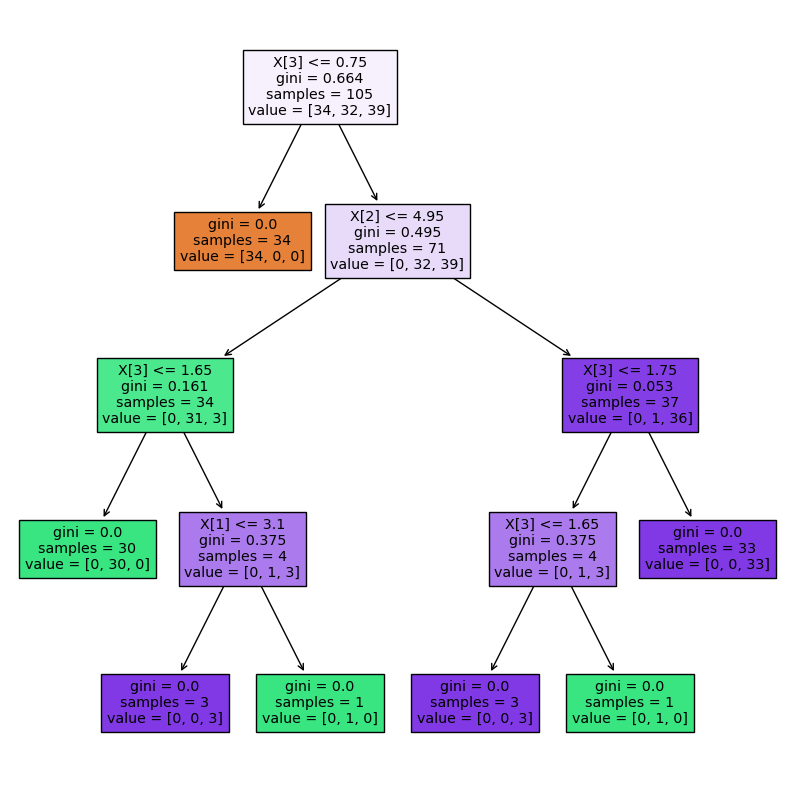

In [5]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [6]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)


0.9777777777777777

#### Question 2: change the initial splitting of the dataset by reducing the size of the training set. 
#### What do you observe on the tree? on the accuracy?

**Answer for Question #2** 

**Observation**

As shown on the plot below, using about only 30% of the training data retains the original accuracy. Reducing the number of training set further would start to greatly reduce the accuracy. Reducing the training samples also reduces the max depth of the tree. Using 30% of the training set not only retains the accuracy, but it also reduces the max depth of the tree by 1.

In [7]:
scores = []
nums = list(range(5,len(X_train),5))
depths = []

for i in nums:
  X_train2 = X_train[:i]
  y_train2 = y_train[:i]

  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train2, y_train2)
  depths.append(clf.tree_.max_depth)

  # clf.predict(X_test)
  scores.append(clf.score(X_test, y_test))

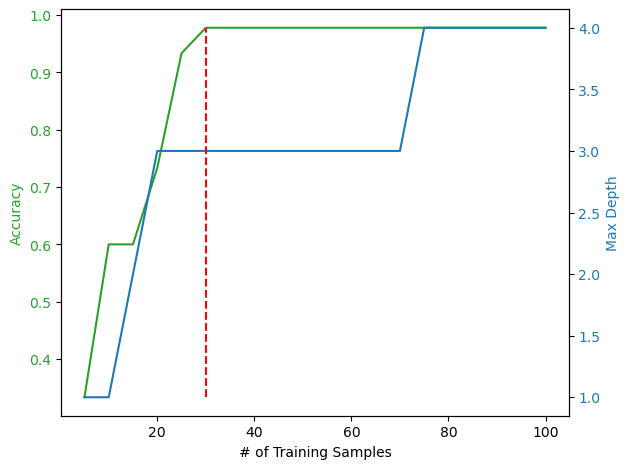

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('# of Training Samples')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(nums, scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Max Depth', color=color)  # we already handled the x-label with ax1
ax2.plot(nums, depths, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.vlines(x=30, ymin=min(depths), ymax=max(depths), color="r", linestyles='dashed')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

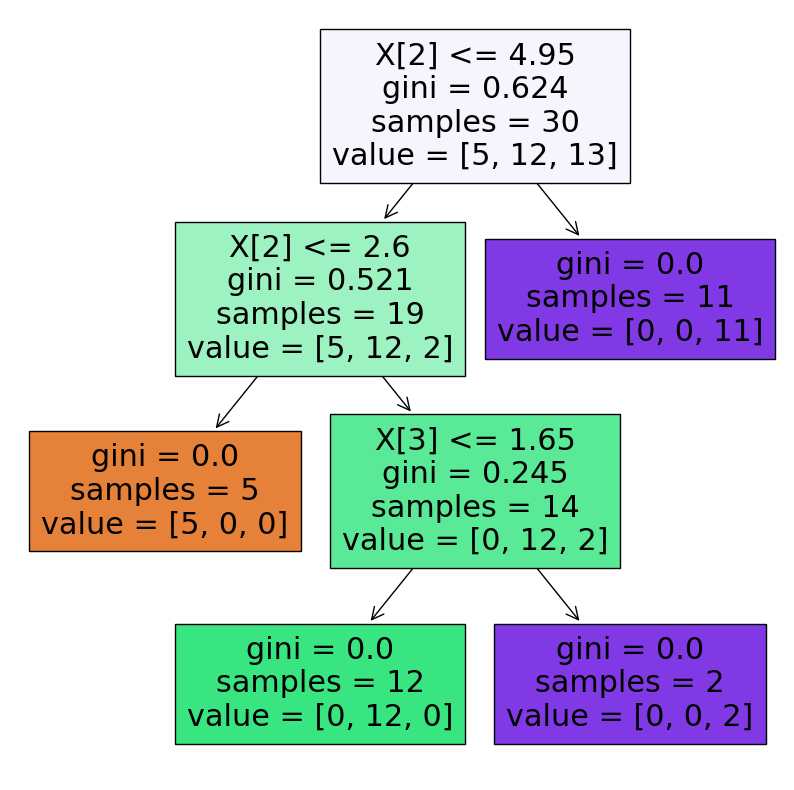

In [9]:
X_train2 = X_train[:30]
y_train2 = y_train[:30]

clf = tree.DecisionTreeClassifier()
clf.fit(X_train2, y_train2)

#display
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True) 
plt.show()

#### Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...). 
#### Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time.

**Answer for Question #3** 

**Conclusion**

We see that setting a minimum number of samples for splitting effectively limits the actual depth of the tree, so it overrides max_depth. We see that for large minimum samples, trees get stuck at a depth of 1, so they all have the same accuracy of ~0.6. Varying the minimum number of samples per leaf shows a smiliar trend. 

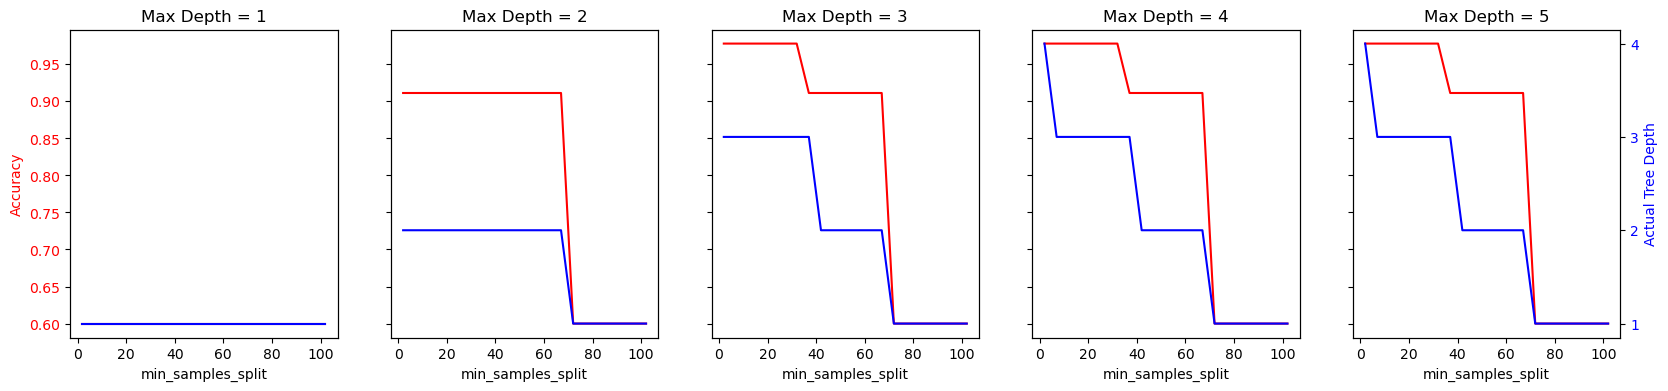

In [10]:
depths = list(range(1,6))
# depths = []
min_samples = list(range(2,len(X_train)+1, 5))

fig, axes = plt.subplots(1, max(depths), sharey=True, figsize=(20,4))
twin_axes = []
  
for d in depths:
  scores = []
  actual_depths = []
  for ms in min_samples:
    clf = tree.DecisionTreeClassifier(max_depth=d, min_samples_split=ms)
    clf.fit(X_train, y_train)
    actual_depths.append(clf.tree_.max_depth)
    scores.append(clf.score(X_test, y_test))

  acc_axis = axes[d-1]
  dep_axis = acc_axis.twinx()
  twin_axes.append(dep_axis)

  acc_axis.plot(min_samples, scores, color='red', label="Accuracy")
  acc_axis.tick_params(axis='y', labelcolor='red')
  acc_axis.set_title(f'Max Depth = {d}')
  acc_axis.set_xlabel("min_samples_split")

  dep_axis.plot(min_samples, actual_depths, color='blue', label="Actual Tree Depth")
  dep_axis.tick_params(axis='y', labelcolor='blue')

  if d != max(depths):
    dep_axis.set_yticks([])

    dep_axis.tick_params(axis='y', labelcolor='None')
  else:
    dep_axis.set_yticks(depths)

    dep_axis.set_ylabel('Actual Tree Depth', color='blue')
  if d==1:
    acc_axis.set_ylabel('Accuracy', color='red')

twin_axes[0].get_shared_y_axes().join(*twin_axes)

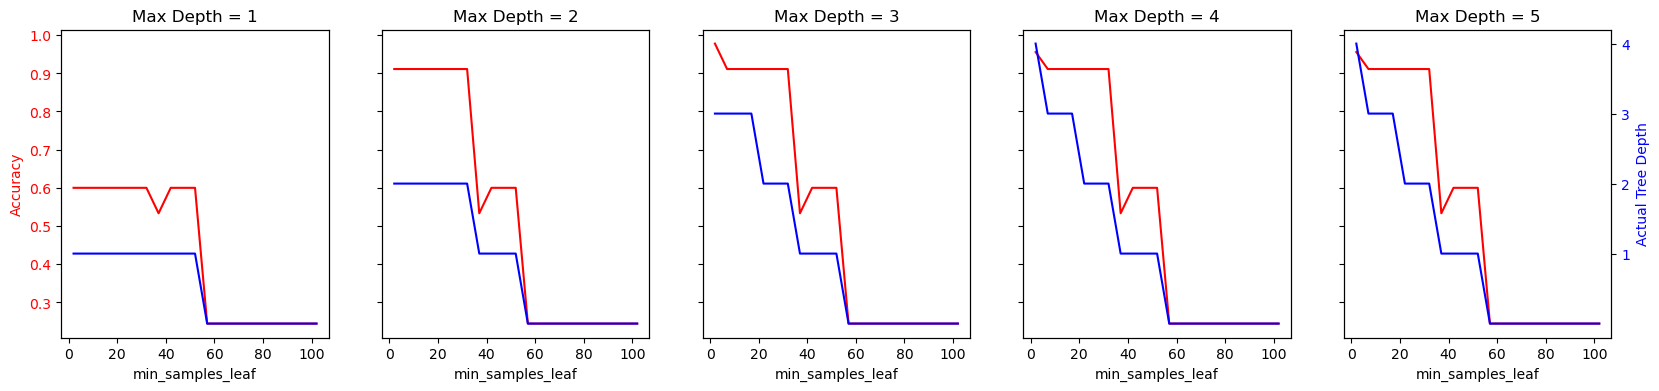

In [11]:
depths = list(range(1,6))
# depths = []
min_samples = list(range(2,len(X_train)+1, 5))

fig, axes = plt.subplots(1, max(depths), sharey=True, figsize=(20,4))
twin_axes = []
  
for d in depths:
  scores = []
  actual_depths = []
  for ms in min_samples:
    clf = tree.DecisionTreeClassifier(max_depth=d, min_samples_leaf=ms)
    clf.fit(X_train, y_train)
    actual_depths.append(clf.tree_.max_depth)
    scores.append(clf.score(X_test, y_test))

  acc_axis = axes[d-1]
  dep_axis = acc_axis.twinx()
  twin_axes.append(dep_axis)

  acc_axis.plot(min_samples, scores, color='red', label="Accuracy")
  acc_axis.tick_params(axis='y', labelcolor='red')
  acc_axis.set_title(f'Max Depth = {d}')
  acc_axis.set_xlabel("min_samples_leaf")

  dep_axis.plot(min_samples, actual_depths, color='blue', label="Actual Tree Depth")
  dep_axis.tick_params(axis='y', labelcolor='blue')

  if d != max(depths):
    dep_axis.set_yticks([])

    dep_axis.tick_params(axis='y', labelcolor='None')
  else:
    dep_axis.set_yticks(depths)

    dep_axis.set_ylabel('Actual Tree Depth', color='blue')
  if d==1:
    acc_axis.set_ylabel('Accuracy', color='red')

twin_axes[0].get_shared_y_axes().join(*twin_axes)

In [12]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]


In [13]:
# Question 4: by testing different trees (built with different parameter values), 
# does a class appear as easier to classify than the others?


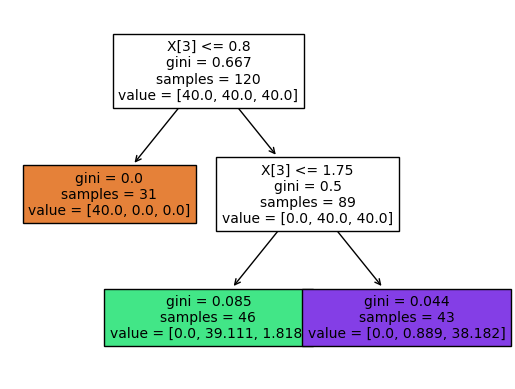

In [14]:
#Tree one 
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0,min_impurity_decrease=0, 
                                       ccp_alpha=0,class_weight="balanced", max_features= 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
decision_tree1 = decision_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree1,filled=True, fontsize = 10) 
plt.show()

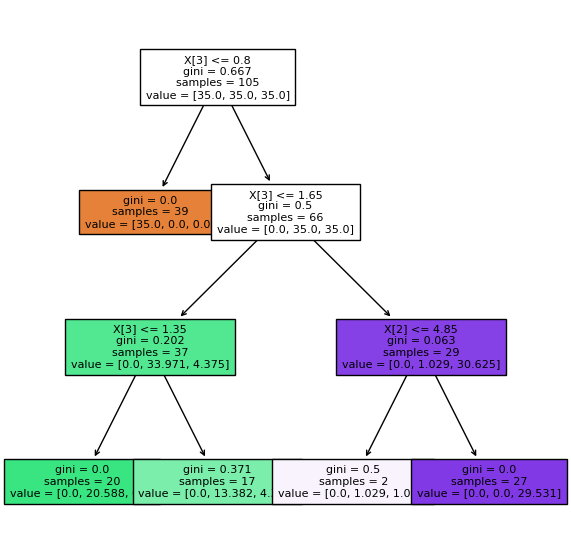

In [15]:
#Tree Two
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0,min_impurity_decrease=0, 
                                       ccp_alpha=0,class_weight="balanced", max_features= 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
decision_tree2 = decision_tree.fit(X_train, y_train)

plt.figure(figsize=(7,7)) 
tree.plot_tree(decision_tree2,filled=True, fontsize = 8) 
plt.show()

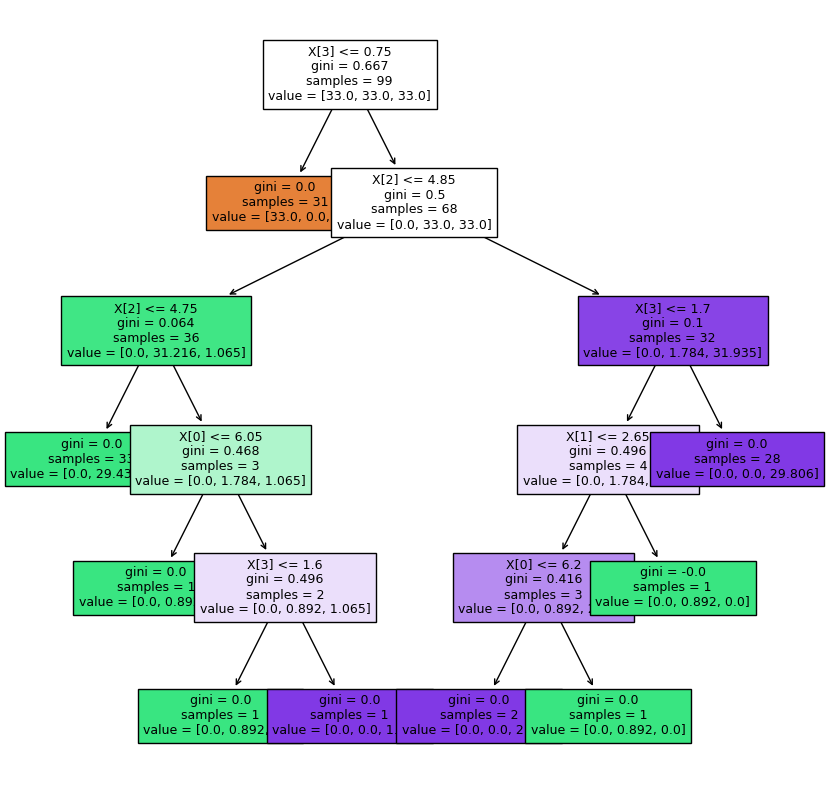

In [16]:
#Tree Three
decision_tree = DecisionTreeClassifier(random_state=2, max_depth=5, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0,min_impurity_decrease=0, 
                                       ccp_alpha=0,class_weight="balanced", max_features= 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)
decision_tree3 = decision_tree.fit(X_train, y_train)


plt.figure(figsize=(10,10)) 
tree.plot_tree(decision_tree3,filled=True, fontsize = 9) 
plt.show()


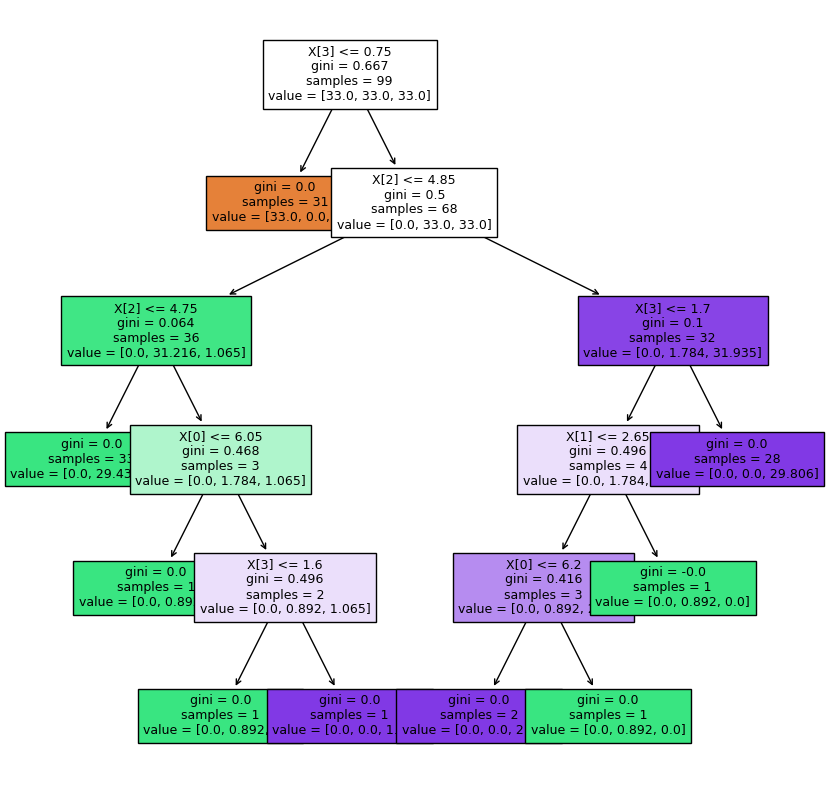

In [17]:
#Tree Four
decision_tree = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0,min_impurity_decrease=0, 
                                       ccp_alpha=0,class_weight="balanced", max_features= 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)
decision_tree4 = decision_tree.fit(X_train, y_train)


plt.figure(figsize=(10,10)) 
tree.plot_tree(decision_tree3,filled=True, fontsize = 9) 
plt.show()


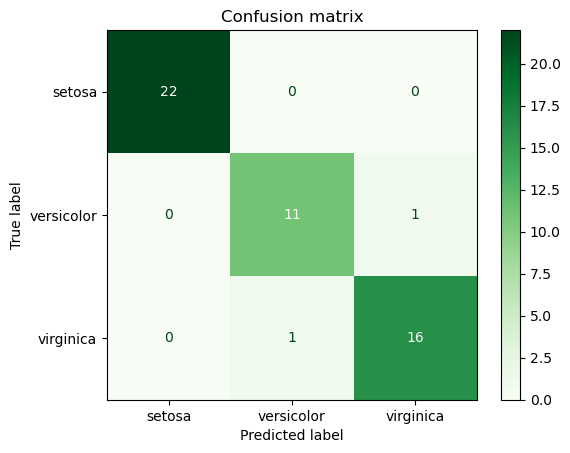

In [18]:
# Confusion Matrix of Tree one
title_options = [("Confusion matrix", None)]
class_names = ["setosa", "versicolor", "virginica"]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(decision_tree1,X_test,y_test,display_labels=class_names,cmap= plt.cm.Greens,normalize=normalize,)
    display.ax_.set_title(title)

plt.show()

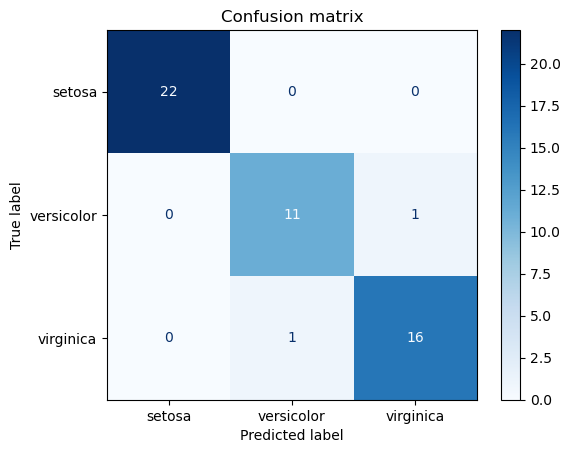

In [19]:
# Confusion Matrix of Tree Two

title_options = [("Confusion matrix", None)]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(decision_tree2,X_test,y_test,display_labels=class_names,cmap= plt.cm.Blues,normalize=normalize,)
    display.ax_.set_title(title)

plt.show()

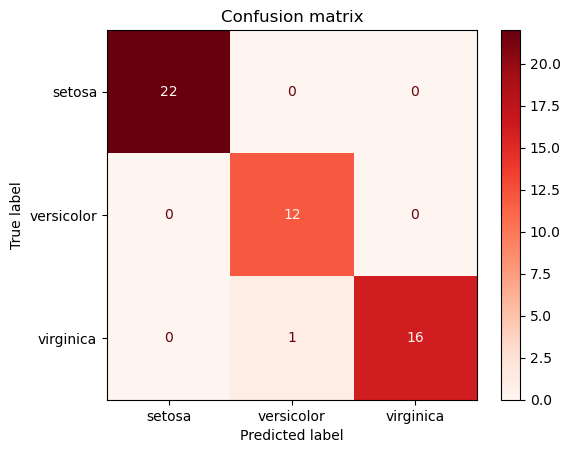

In [20]:
# Confusion Matrix of Tree Three
title_options = [("Confusion matrix", None)]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(decision_tree3,X_test,y_test,display_labels=class_names,cmap= plt.cm.Reds,normalize=normalize,)
    display.ax_.set_title(title)

plt.show()

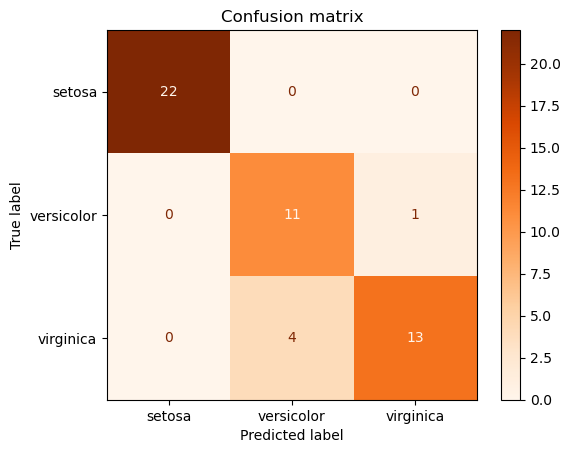

In [21]:
# Confusion Matrix of Tree Four
title_options = [("Confusion matrix", None)]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(decision_tree4,X_test,y_test,display_labels=class_names,cmap= plt.cm.Oranges,normalize=normalize,)
    display.ax_.set_title(title)

plt.show()

**Answer for Question #4** 


From the confusion matrix of these four different trees with the tuned parameters of maximum depth, random condition, minimum sample splitting, minimum sampling of leaf, minimum weight fraction of leaf, minimum impurity removal and train size. We can observe that the Setosa class is easier to classify than the others. This remains the case when the maximum depth of the tree is between two and five. The classes Versicolor and Viginica are misclassified when the maximum depth and train size parameters are varied.

With a fixed train size of 0.66 and a different value for the maximum depth, the number of data rows before splitting remains the same and more values are classified in the Setosa class. The tree gets stuck at a maximum depth of 5.  Increasing the maximum depth after 5 and keeping the other parameters constant does not produce a significant result. Varying the minimum number of samples per leaf and the minimum partitioning of the samples shows a similar result.